<a href="https://colab.research.google.com/github/ryali93/UNMSM_programacion/blob/master/jupyter/clase14_EarthEngine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Earth Engine Colab Intro

This notebook is a brief introduction to the  **Earth Engine Python API** potencialities. Here you can access to planetary maps and aerial imagery that are much more extensive and considerably more specialized than those immediately accessible through Google Earth.  These include global and sub-global datasets relating to land cover, topographic elevation, 
and meteorological conditions that often range over time as well as space.

<center>
![](https://raw.githubusercontent.com/csaybar/programacionUNMSM/master/class02%3AGEE/img/ee.png)

## What is Google Earth Engine?

Earth Engine consists of a multi-petabyte analysis-ready data catalog
co-located with a high-performance, intrinsically parallel computation service. It is accessed and controlled through an Internet-accessible application programming interface (API) and an associated web-based interactive development environment (IDE) that enables rapid prototyping and visualization of results.

The data catalog houses a large repository of publicly available geospatial datasets, including observations from a variety of satellite and aerial imaging systems in both optical and non-optical wavelengths,
environmental variables, weather and climate forecasts and
hindcasts, land cover, topographic and socio-economic datasets. All of
this data is preprocessed to a ready-to-use but information-preserving
form that allows efficient access and removes many barriers associated
with data management.

<center>
![](https://raw.githubusercontent.com/csaybar/programacionUNMSM/master/class02%3AGEE/img/architecture.png)
  
**A simplified system architecture diagram.**

#  ¿What is colab?

Google **colab** is a free cloud service (jupyter as service) with GPU and TPU support.

<img class="center"  height="200" src="https://colab.research.google.com/img/colab_favicon_256px.png" >

### Try yourself!!

In [0]:
#check the SO
!cat /etc/*release

In [0]:
#How many cpu are there?
!lscpu

In [0]:
# How much RAM does it have?
!grep MemTotal /proc/meminfo

## 1. Autorizando servicios

In [0]:
#@title Google Earth Engine (Oauth2 Authorization)

# Check if the server is authenticated. If not, display instructions that
# explain how to complete the process.

!pip install earthengine-api
import ee  

!earthengine authenticate
ee.Initialize()

In [0]:
#@title Google Drive (Oauth Authorization)
from google.colab import drive
drive.mount('/content/drive')

In [0]:
from matplotlib import pyplot

## 2. Colab & Google drive example

In [0]:
#1._ Create a folder in google drive from colab
import os, errno
newfolder = 'drive/My Drive/claseEE/'
os.makedirs(newfolder)

In [0]:
#2._ Change current directory /content to newfolder
pwd      # 1.current directory

'/content'

In [0]:
cd /content/drive/My\ Drive/claseEE/

/content/drive/My Drive/clase03


In [0]:
pwd

'/content'

### Instalación de EE API

In [0]:
!pip install earthengine-api #earth-engine Python API

In [0]:
!earthengine authenticate

#### Testing

In [0]:
import ee
ee.Initialize()

## 3. Objectos Google Earth 

Piense en **_ee.Thing_** como un contenedor para una cosa que existe en el servidor. En este ejemplo, la cadena se define primero y luego se coloca en el contenedor. También puede definir el contenedor y su contenido a la vez. Por ejemplo:

Aunque el primer argumento para **print()** es solo una cadena en el cliente, el segundo argumento se envía al servidor para que se evalúe y luego se devuelva.

### 3.1 Strings
Por ejemplo, defina una cadena, luego póngala en el contenedor ee.String () para enviarla a Earth Engine:

In [0]:
# Defina una cadena, luego póngala en un contenedor de EE.
aString = 'To the cloud!'
eeString = ee.String(aString)
print('Where to?', eeString)

Where to? ee.String("To the cloud!")


### 3.2 Numbers
Use **ee.Number ()** para crear números de objetos en el servidor.


In [0]:
import math
serverNumber = ee.Number(math.e)
print('e=', serverNumber);

e= ee.Number(2.718281828459045)


In [0]:
log_e = serverNumber.log()
log_e.getInfo()

1.0

### 3.3 List

Para convertir una lista de Python en un objeto ee.List en el servidor, puede colocar un literal de Python en un contenedor como con números y cadenas. Earth Engine también proporciona métodos de conveniencia del lado del servidor para hacer secuencias de números. Por ejemplo:

In [0]:
eeList = ee.List([1, 2, 3, 4, 5])
# Make a sequence the easy way!
sequence = ee.List.sequence(1, 5)
print('Sequence:', sequence)
sequence.getInfo()

Sequence: ee.List({
  "type": "Invocation",
  "arguments": {
    "start": 1,
    "end": 5
  },
  "functionName": "List.sequence"
})


[1.0, 2.0, 3.0, 4.0, 5.0]

### 3.4 Dictionaries

You can construct an Earth Engine Dictionary from a Python object, as with strings, numbers and lists. At construction time, you can use JavaScript functionality to initialize the Earth Engine object. In this case an ee.Dictionary is constructed directly from a Python literal object:

Puedes construir un  Earth Engine Dictionary a partir de un objeto de Python, como con cadenas, números y listas. En el momento de la construcción, puede utilizar la funcionalidad de JavaScript para inicializar el objecto Earth Engine. En este caso, un ee.Dictionary se construye directamente desde un objeto literal de Python:



In [0]:
import math 

dictionary = ee.Dictionary({
  'e': math.e,
  'pi': math.pi,
  'phi': (1 + math.sqrt(5)) / 2
})

print('Euler:', dictionary.get('e'))
print('Pi:', dictionary.get('pi'))
print('Golden ratio:', dictionary.get('phi'))

dictionary.keys().getInfo()

### 3.5 Dates

Los objetos de fecha son la forma en que Earth Engine representa el tiempo. Como en los ejemplos anteriores, es importante distinguir entre un objeto de fecha de Python y un objeto ee.Date de Earth Engine. Construya un ee.Date a partir de una cadena, a partir de una fecha de Python, o usando métodos estáticos proporcionados por la clase ee.Date. Este ejemplo ilustra la construcción de fechas a partir de cadenas o una fecha de Python que representa milisegundos desde la medianoche del 1 de enero de 1970:

In [0]:
# Create a Date object using a string
date = ee.Date('2015-12-31')
print('Date:', date)
print(date.getInfo())

# Create a Date object using the module datetime
import datetime
now = datetime.datetime.now()
print('Milliseconds since January 1, 1970', now)
eeNow = ee.Date(now)
print('Now:', eeNow)
eeNow.getInfo()

### 3.6 Digression: passing parameters by name

Los métodos de Arguments to Earth Engine se pueden pasar en orden, por ejemplo, para crear una fecha de ee a partir del año, mes y día, puede pasar los parámetros del método estático fromYMD () en el año, mes, día del pedido:

In [0]:
# First method
aDate = ee.Date.fromYMD(2017, 1, 13)
print('aDate:', aDate)
aDate.getInfo()

## 4. Hello world 
---

**ee.Image('assetID'):** En GEE, los datos ráster se representan como **Image objects**. Las imágenes se componen de una o más bandas y cada banda tiene su propio nombre, tipo de datos, escala, máscara y proyección. Cada imagen tiene metadatos almacenados como un conjunto de propiedades.

**ee.Image()** acepta una variedad de argumentos:
- A string: un ID activo de EarthEngine,
- A string and a number --Una cadena y un número-- ,
- A number or EEArray: crea una imagen constante,
- A list: crea una imagen fuera de cada elemento de la lista y las combina en una sola imagen,
- An ee.Image: devuelve el argumento,
- Nothing: da como resultado una imagen transparente vacía.

---

**ee.Terrain.hillshade**
Calcula una sombra simple de un DEM.

**ee.Terrain.slope**
Calcula la pendiente en grados desde un terreno DEM. El gradiente local se calcula utilizando los vecinos conectados a 4 de cada píxel, por lo que los valores que faltan aparecerán alrededor de los bordes de una imagen.

---
**ee.Image.addBands()**
Devuelve una imagen que contiene todas las bandas copiadas de la primera entrada y las bandas seleccionadas de la segunda entrada, opcionalmente sobrescribiendo las bandas en la primera imagen con el mismo nombre. La nueva imagen tiene los metadatos y la huella de la primera imagen de entrada.

In [0]:
from IPython.display import Image
# Display a thumbnail of a sample image asset.
Image(url=ee.Image("USGS/SRTMGL1_003").getThumbUrl({'min': 0, 'max': 3000}))

In [0]:
#Loading a image
terrain = ee.Image("CGIAR/SRTM90_V4").float()
terrain.getInfo()

#### slope
*Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918*

Horn (1981) Calcula la pendiente de una celda focal mediante el uso de una estimación de diferencia central de una superficie adaptada a la célula focal y sus vecinos. La pendiente elegida es el máximo de esta superficie y puede devolverse en varios formatos.

#### aspect
*Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918*

Horn (1981) calcula el aspecto como la dirección de la pendiente máxima de la celda focal. El valor devuelto es en grados.

In [0]:
# Estimating the slope
slope = ee.Terrain.slope(terrain).float()

# Estimating the hillshade
aspect = ee.Terrain.aspect(terrain).float()

#Adding the slope and hillshade to the dem
newterrain = terrain.addBands(slope).addBands(aspect)
print(newterrain)

## 4.  Upload a Shapefile

In [0]:
#4.1 Install libraries
!pip install geopandas # manipulate geometries in python
!pip install descartes # vizualization library

In [0]:
#4.2 Install libraries
import geopandas as gpd # Manipulate geometries in python
import urllib # Package that collects several modules for working with URLs.
import zipfile # Unzip a *.zip file
from matplotlib import pyplot as plt # Data vzualization with python!

In [0]:
#4.3 download "prov.zip"
provincias = 'https://github.com/csaybar/programacionUNMSM/raw/master/class02:GEE/data/data.zip'
urllib.request.urlretrieve(provincias, 'prov.zip')

#4.4 unzip
zpfile = 'prov.zip'
with zipfile.ZipFile(zpfile, 'r') as zip_file:
  zip_file.extractall('.')

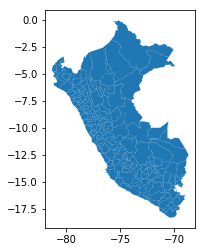

In [0]:
provincias = gpd.read_file('Provincia.shp')
provincias.plot()
plt.show()

## 5. Geopandas to ee.Geometry

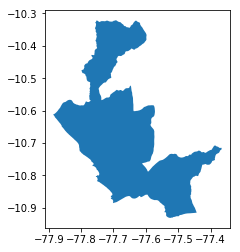

In [0]:
# 5.1 Select a province of Peru!
quispicanchi = provincias[provincias.NOMBRE == 'BARRANCA']
quispicanchi_geojson = eval(quispicanchi.to_json())
quispicanchi.plot()
plt.show()

- **ee.Geometry('type menber'):** GEE handles vector data with the Geometry type. The [GeoJSON](http://geojson.org/geojson-spec.html) spec describes in detail the type of geometries supported by Earth Engine.

![](https://r-spatial.github.io/sf/articles/sf1_files/figure-html/unnamed-chunk-20-1.png)

---
- **ee.Feature('type menber'):** A Feature in GEE is defined as a **GeoJSON** Feature. Specifically, a Feature is an object with a **geometry property** storing a Geometry object (or null) and a **properties property** storing a dictionary of other properties.


In [0]:
# 5.2 Creating a ee.Geometry
coord_poly = quispicanchi_geojson['features'][0]['geometry']['coordinates']
properties_poly = quispicanchi_geojson['features'][0]['properties']

# 5.3 Creating a ee.Feature (Remenber that ee.Feature(ee.Geometry,properties))
quispicanchi_geom = ee.Geometry.Polygon(coord_poly)
quispicanchi_feature = ee.Feature(quispicanchi_geom,properties_poly)
print(quispicanchi_feature)

## 6. Clipping image and metada

In [0]:
newterrain_crop = newterrain.clip(quispicanchi_feature)

print(newterrain_crop.bandNames().getInfo()) #band names
print(newterrain_crop.projection().getInfo()) #CRS and transform
print(newterrain_crop.projection().nominalScale().getInfo()) #pixel resolution
print(newterrain_crop.propertyNames().getInfo()) #List of metadata properties

## 7. Dowloading a ee.Image()

In [0]:
# 7.1 First method (obsolete)
pixel_size = newterrain_crop.projection().nominalScale().getInfo()
terrain = newterrain_crop.getDownloadURL({
            'scale':pixel_size,
            'crs':'EPSG:4326'
    })
print(terrain)

https://earthengine.googleapis.com/api/download?docid=28d710732220d25d64766c1fe2327fba&token=a12a6bab39bbcc171b1d9b41cf1d5800


In [0]:
#7.2 Second method (Save in your google drive account)
task_config = {
    'scale': pixel_size,
    'folder': 'myfirstfolder'
    #'region': geometry
    }

task = ee.batch.Export.image(newterrain_crop, 'myterrain', task_config)
task.start()

In [0]:
task.status()

## NDVI using Landsat8

In [0]:
init_date = ee.Date('2015-12-31')
last_date = ee.Date('2018-12-31')
l8_s = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")\
         .filterDate(init_date,last_date)\
         .max()\
         .normalizedDifference(['B5', 'B4'])\
         .clip(quispicanchi_feature)

task_config = {
    'scale': 30,
    'folder': 'myfirstfolder'
}
task = ee.batch.Export.image(l8_s, 'ndvi', task_config)
task.start()

In [0]:
task.status()

{'creation_timestamp_ms': 1562138184146,
 'description': 'ndvi',
 'id': '3RSPU23GOWRBHX2SWC7AL5LC',
 'progress': 0.0,
 'start_timestamp_ms': 1562138185936,
 'state': 'RUNNING',
 'task_type': 'EXPORT_IMAGE',
 'update_timestamp_ms': 1562138186118}